# Homework 4.3: Vectorial arithmetic using Embeddings
Dartmouth College, LING48/CS72, Winter 2024<br>
Kenneth Lai (Kenneth.Han.Lai@dartmouth.edu)

This notebook uses a variant of Word2Vec called [FastText](https://fasttext.cc/docs/en/crawl-vectors.html), which learns both words and subword units. Specifically, we use [compress-fasttext](https://github.com/avidale/compress-fasttext), which allows for models to fit in memory. The script downloads a collection of embeddings (the .bin file) and then performs operations like analogies, similarity measurements, and "odd-one-out" operations.

The notebook also has code to generate a tSNE chart for a sequence of words.

You can learn more about the details of the code below here:<br>
https://samyzaf.com/ML/nlp/nlp.html

I got the visualization code from here:<br>
https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

You can learn more about word2vec here:<br>
http://jalammar.github.io/illustrated-word2vec/

In your homework you will need to modify this code to download models for other languages. You can find them here:<br>https://zenodo.org/records/4905385

### CS72/LING48 Homework 4.2: Convolutional Neural Networks and ASL
### Assignment Code Edited by: Amittai Siavava

In [1]:
#=============================================================================
# Install fasttext model loaders
# https://github.com/avidale/compress-fasttext
#=============================================================================

%pip install compress-fasttext

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 11.5 MB/s eta 0:00:0000:0100:01
  Using cached smart_open-6.4.0-py3-none-any.whl (57 kB)
  Created wheel for compress-fasttext: filename=compress_fasttext-0.1.4-py3-none-any.whl size=16097 sha256=e7d19843516496bef3437101614b30be51bbfcc2754ce3a2fb5df1b3bd1e425c
  Stored in directory: /Users/amittaijoel/Library/Caches/pip/wheels/ef/0f/e8/5873a842310e96066067d9300281979b4a7d74b46d938f440e
Successfully built compress-fasttext
Note: you may need to restart the kernel to use updated packages.


In [4]:
#=============================================================================
# In your homework you need to replace the English model for another language.
# There are 101 languages available.
# https://zenodo.org/records/4905385
#
# Loading this might take 1~3 minutes.
#=============================================================================

!curl -o en.bin https://zenodo.org/records/4905385/files/fasttext-fr-mini?download=1

zsh:1: no matches found: https://zenodo.org/records/4905385/files/fasttext-fr-mini?download=1


In [5]:
#=============================================================================
# Load libraries
#=============================================================================

import compress_fasttext
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.manifold import TSNE

In [7]:
#=============================================================================
# Load model into memory
#=============================================================================

embeddings = compress_fasttext.models.CompressedFastTextKeyedVectors.load('fr.bin')
print(embeddings.vector_size)

300


In [8]:
#=============================================================================
# Most similar word
#=============================================================================

embeddings.similar_by_key('university', topn=25)

[('University', 0.5600832266435751),
 ('Université', 0.4604234811344848),
 ('université', 0.4503176791390641),
 ('Library', 0.4030265627158037),
 ('polytechnique', 0.3953394791478581),
 ('universitaire', 0.3896474992417391),
 ('Ecole', 0.38663068661392885),
 ('École', 0.38308707796556385),
 ('Ambassade', 0.382330056289872),
 ('Institute', 0.38072232797426886),
 ('universités', 0.37244156820417157),
 ('Museum', 0.37126070317563636),
 ('ambassade', 0.36966589686490525),
 ('école', 0.3660739327945625),
 ('académie', 0.3612988810391684),
 ('émérite', 0.35692095798217355),
 ('School', 0.35306480016443614),
 ('archevêque', 0.3501715031472025),
 ('Paribas', 0.34940157131182825),
 ('Académie', 0.3493451282171487),
 ('Academy', 0.34905141454902155),
 ('Faculté', 0.3476185681103734),
 ('maternelle', 0.3440358964286518),
 ('Institut', 0.34401088205139824),
 ('edition', 0.34283235094415787)]

In [18]:
embeddings.similar_by_key('homme', topn=25)

[('Homme', 0.715788992459468),
 ('femme', 0.6792130446046185),
 ('individu', 0.5995961856816512),
 ('humain', 0.5839239000863403),
 ('hommes', 0.5813957514791586),
 ('jeune', 0.5668726601402013),
 ('garçon', 0.5623198601392997),
 ('enfant', 0.5575594866314283),
 ('animal', 0.5545167224571268),
 ('adolescent', 0.5367634606741996),
 ('vieil', 0.5359744816692288),
 ('singe', 0.5227550818916235),
 ('célibataire', 0.5073824546217318),
 ('mari', 0.5053027766075612),
 ('écrivain', 0.5047432589512302),
 ('ami', 0.5038613101528009),
 ('soldat', 0.500700776057545),
 ('amant', 0.5001427552852984),
 ('politicien', 0.4955403706804678),
 ('citoyen', 0.48642744363889967),
 ('honnête', 0.4859937929952611),
 ('officier', 0.4854815168888595),
 ('diplomate', 0.4843746548493713),
 ('philosophe', 0.48425762348200146),
 ('travailleur', 0.479319323882026)]

In [19]:
embeddings.similar_by_key('femme', topn=25)

[('fille', 0.7763178251116244),
 ('homme', 0.6792130452638785),
 ('fillette', 0.6528843266492257),
 ('Femme', 0.6467468709432685),
 ('épouse', 0.6380390302551797),
 ('jeune', 0.6369479229896292),
 ('dame', 0.634214203538626),
 ('compagne', 0.6335388719443328),
 ('mari', 0.628301570338084),
 ('mariée', 0.6249922264308406),
 ('veuve', 0.611613406644845),
 ('demoiselle', 0.6041787131540101),
 ('mère', 0.6029852224038255),
 ('célibataire', 0.6000252503075061),
 ('fiancée', 0.5950792695843486),
 ('femmes', 0.5841418199904548),
 ('blonde', 0.5759548090186365),
 ('maman', 0.5659885677011403),
 ('adolescente', 0.5611369757187321),
 ('maîtresse', 0.5547053666609557),
 ('âgée', 0.5483368515334999),
 ('nièce', 0.547749105227188),
 ('féminine', 0.5425709500412337),
 ('copine', 0.5408740031494103),
 ('soeur', 0.5401133953677445)]

In [10]:
#=============================================================================
# Analogy
# Man is to king as woman is to _____
#=============================================================================

king = embeddings.get_vector('roi')                 # NOTE: roi = king
man = embeddings.get_vector('homme')                # NOTE: homme = man
woman = embeddings.get_vector('femme')              # NOTE: femme = woman
embeddings.similar_by_vector(king - man + woman)

[('roi', 0.9389266846280078),
 ('Roi', 0.7386494577532611),
 ('reine', 0.6716318158428617),
 ('monarque', 0.628661298994758),
 ('prince', 0.6266587432913858),
 ('rois', 0.6190010137002834),
 ('souverain', 0.6107840491901726),
 ('royaume', 0.5943550313903481),
 ('duc', 0.56590231062168),
 ('Reine', 0.5439733746803109)]

In [11]:
#=============================================================================
# Analogy
# Germany is to Berlin as France is to _____
#=============================================================================

berlin = embeddings.get_vector('Berlin')
germany = embeddings.get_vector('Germany')
france = embeddings.get_vector('France')
embeddings.similar_by_vector(berlin - germany + france)

[('Berlin', 0.7295416212204661),
 ('France', 0.6558760934491875),
 ('Paris', 0.5697034897550504),
 ('Allemagne', 0.5594076987830998),
 ('Londres', 0.5511727996613075),
 ('Europe', 0.5378230741115012),
 ('Munich', 0.525371306071917),
 ('Grande-Bretagne', 0.5191098940626095),
 ('Bruxelles', 0.5178487777136745),
 ('Varsovie', 0.5097245969075059)]

In [26]:
#=============================================================================
# Euclidean distance between two words
#=============================================================================

w1 = embeddings.get_vector("homme")
w2 = embeddings.get_vector("femme")

print(f"homme: {w1.shape}")
print(f"femme: {w2.shape}")
dist = np.linalg.norm(w2 - w1)
print(f"Distance between homme and femme: {dist}")

# words most similar to homme
print(f"\n\nMost similar to homme")
for word, score in embeddings.similar_by_key('homme', 25):
  print(f"\t{word}: {score}")

# words most similar to femme
print(f"\n\nMost similar to femme")
for word, score in embeddings.similar_by_key('femme', 25):
  print(f"\t{word}: {score}")

homme: (300,)
femme: (300,)
Distance between homme and femme: 0.6933757018966351


Most similar to homme
	Homme: 0.715788992459468
	femme: 0.6792130446046185
	individu: 0.5995961856816512
	humain: 0.5839239000863403
	hommes: 0.5813957514791586
	jeune: 0.5668726601402013
	garçon: 0.5623198601392997
	enfant: 0.5575594866314283
	animal: 0.5545167224571268
	adolescent: 0.5367634606741996
	vieil: 0.5359744816692288
	singe: 0.5227550818916235
	célibataire: 0.5073824546217318
	mari: 0.5053027766075612
	écrivain: 0.5047432589512302
	ami: 0.5038613101528009
	soldat: 0.500700776057545
	amant: 0.5001427552852984
	politicien: 0.4955403706804678
	citoyen: 0.48642744363889967
	honnête: 0.4859937929952611
	officier: 0.4854815168888595
	diplomate: 0.4843746548493713
	philosophe: 0.48425762348200146
	travailleur: 0.479319323882026


Most similar to femme
	fille: 0.7763178251116244
	homme: 0.6792130452638785
	fillette: 0.6528843266492257
	Femme: 0.6467468709432685
	épouse: 0.6380390302551797
	jeune: 0.6

In [13]:
#=============================================================================
# Euclidean distance between two words
#=============================================================================

w1 = embeddings.get_vector("breakfast")
w2 = embeddings.get_vector("shoe")
dist = np.linalg.norm(w2 - w1)
print(dist)

0.6843685677661986


In [14]:
#=============================================================================
# Uncomment these lines to use CJK fonts in the tSNE chart
#=============================================================================

#!wget https://github.com/googlefonts/noto-cjk/releases/download/Sans2.004/03_NotoSansCJK-OTC.zip
#!unzip 03_NotoSansCJK-OTC.zip
#import matplotlib.font_manager as fm
#fprop = fm.FontProperties(fname='/content/NotoSansCJK-Regular.ttc')

In [15]:
#=============================================================================
# tSNE plot. Based on code from:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
#=============================================================================

def reduce_dimensions(model, words):
    
    # extract the words & their vectors, as numpy arrays
    wordVectors = []
    
    for w in words:
      wordVectors.append(embeddings.get_vector(w))

    vectors = np.asarray(wordVectors)
    labels = np.asarray(words)

    # reduce using t-SNE
    tsne = TSNE(n_components=2, random_state=1, perplexity=3)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    for i in indices:
      plt.annotate(labels[i], (x_vals[i], y_vals[i]))
      #plt.annotate(labels[i], (x_vals[i], y_vals[i]), fontproperties=fprop) # Uncomment this line for CJK fonts

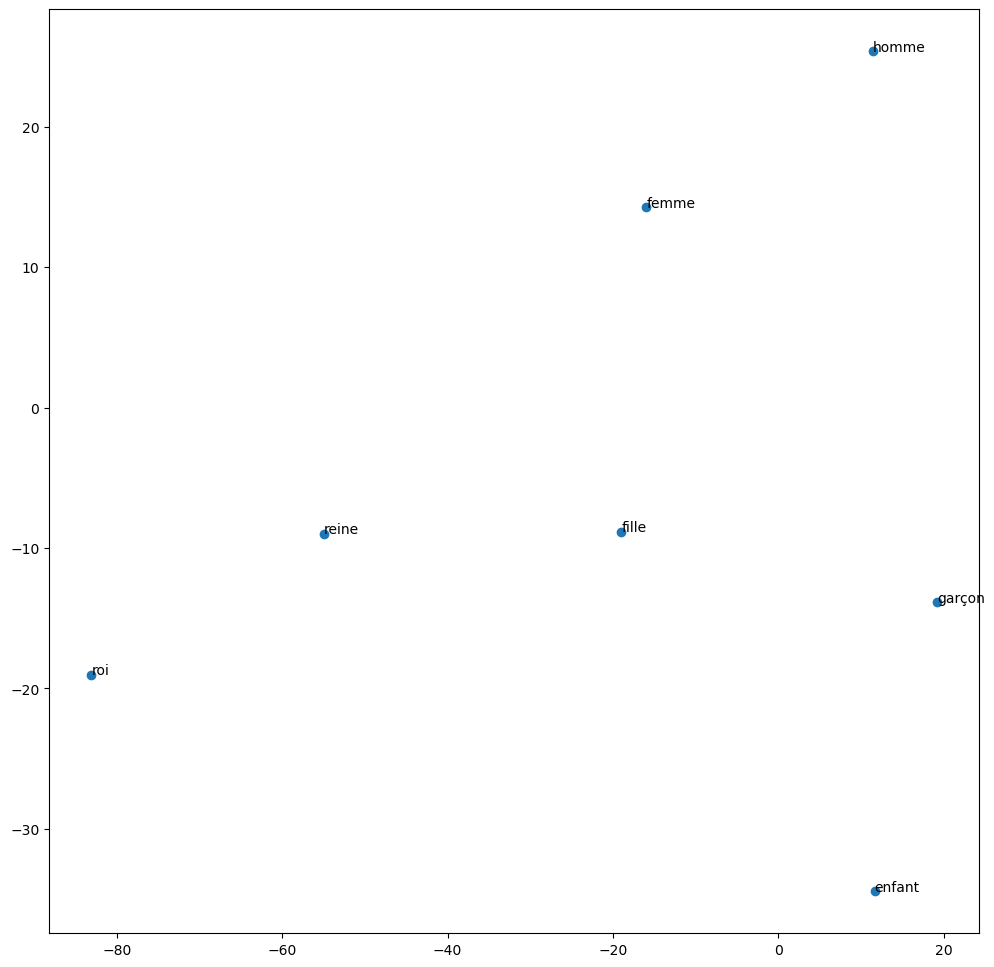

In [17]:
#=============================================================================
# Draw tSNE chart for individual words
#=============================================================================

#? english
# wordsInChart = ['man','woman','king','queen','child','boy','girl']

#? french
wordsInChart = ['homme','femme','roi','reine','enfant','garçon','fille']
x_vals, y_vals, labels = reduce_dimensions(embeddings, wordsInChart)
plot_with_matplotlib(x_vals, y_vals, labels)